## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [16]:
import sys
!{sys.executable} -m pip install openpyxl

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the Excel file
excel_path = 'Task (2) Dataset.xlsx'
data = pd.read_excel(excel_path)

# Performing summary statistics on the numerical columns of the dataset
summary_statistics = data.describe()
print(summary_statistics)



                            Datetime  TrafficIndexLive     JamsCount  \
count                          66639      66639.000000  66639.000000   
mean   2023-07-21 19:21:11.079652864         14.043113     74.278531   
min              2022-12-16 11:01:30          0.000000      0.000000   
25%              2023-05-04 19:01:15          3.000000      9.000000   
50%              2023-08-11 02:16:30         10.000000     29.000000   
75%              2023-10-13 05:01:30         21.000000     95.000000   
max              2023-12-15 08:46:30        138.000000   1359.000000   
std                              NaN         13.488906    107.452022   

          JamsDelay    JamsLength  TrafficIndexWeekAgo  TravelTimeHistoric  \
count  66639.000000  66639.000000         66639.000000        62772.000000   
mean     288.353877     49.316135            13.981737           70.706601   
min        0.000000      0.000000             0.000000           49.381346   
25%       27.700000      3.000000      

### Identify and analyze patterns in the data.

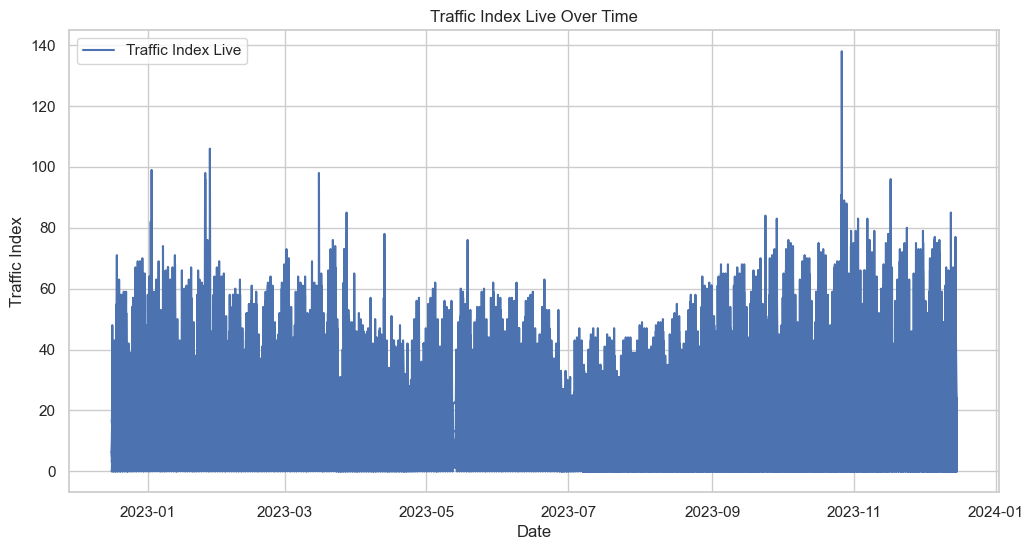

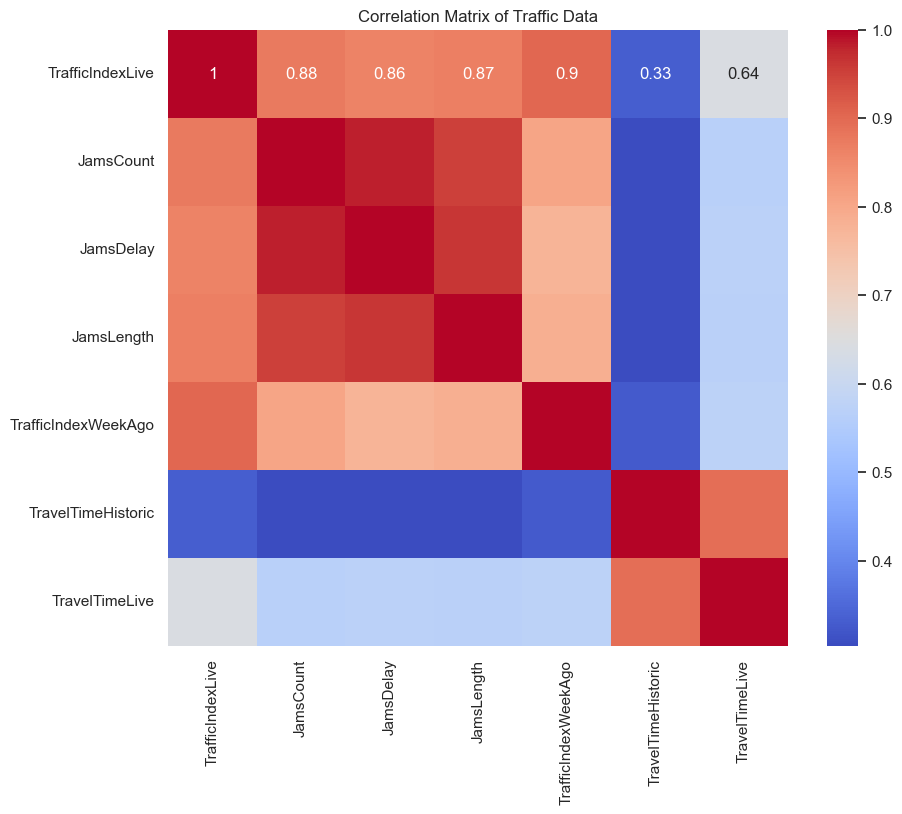

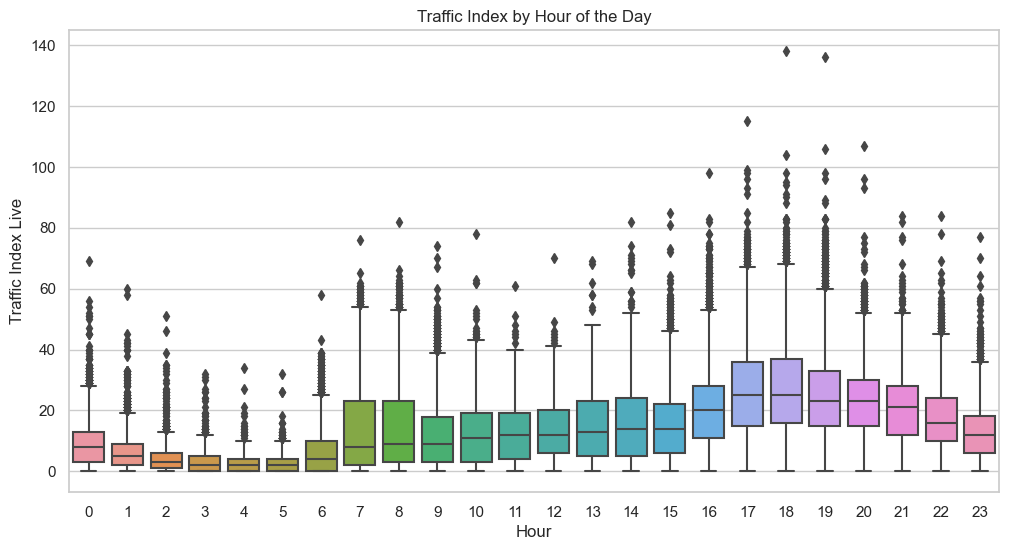

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


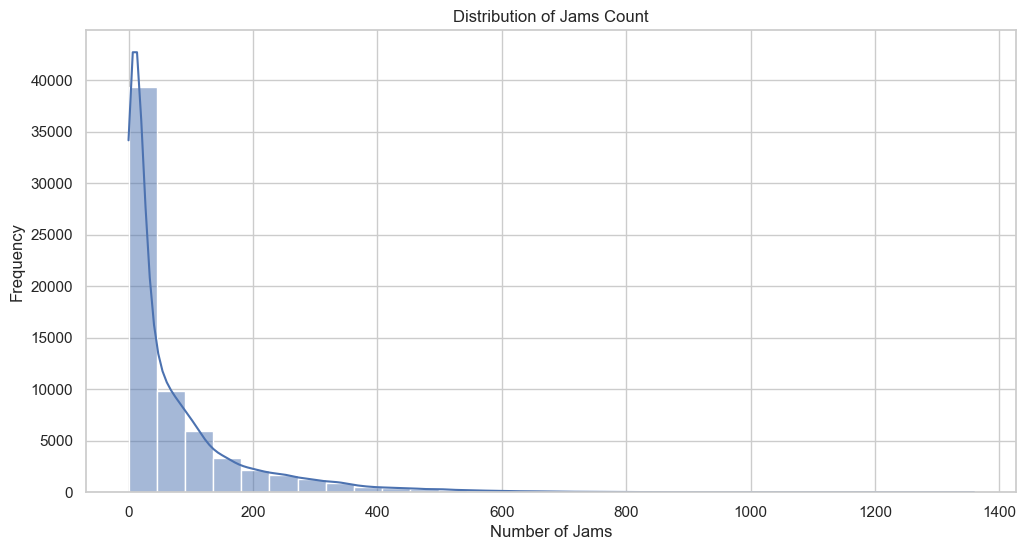

In [17]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Ensure only numeric data is used for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])  # This ensures only numeric columns are considered

# Plotting TrafficIndexLive over time
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['TrafficIndexLive'], label='Traffic Index Live')
plt.title('Traffic Index Live Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Index')
plt.legend()
plt.show()

# Correlation matrix heatmap of only numeric data
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Traffic Data')
plt.show()

# Analyzing traffic by hour of the day
data['Hour'] = data['Datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='TrafficIndexLive', data=data)
plt.title('Traffic Index by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Traffic Index Live')
plt.show()

# Histograms of JamsCount
plt.figure(figsize=(12, 6))
sns.histplot(data['JamsCount'], kde=True, bins=30)
plt.title('Distribution of Jams Count')
plt.xlabel('Number of Jams')
plt.ylabel('Frequency')
plt.show()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


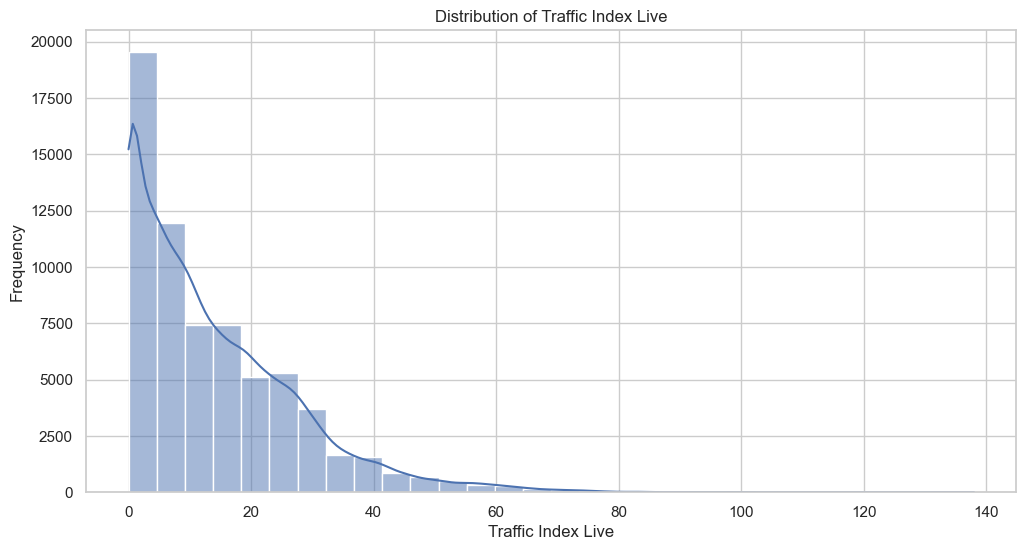

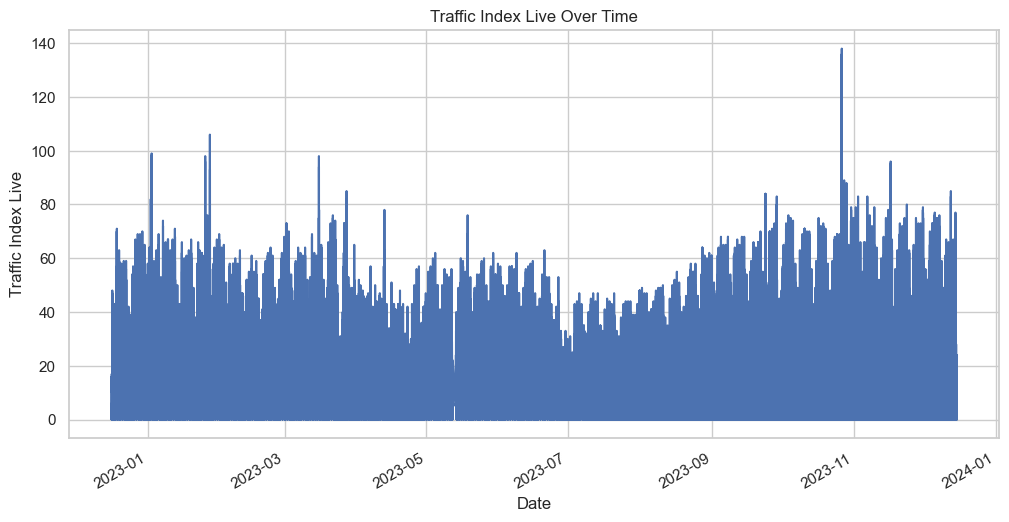

In [18]:
# Plotting TrafficIndexLive distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['TrafficIndexLive'], kde=True, bins=30)
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()

# Plotting Traffic Index distribution over time
plt.figure(figsize=(12, 6))
data.set_index('Datetime')['TrafficIndexLive'].plot()
plt.title('Traffic Index Live Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Index Live')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


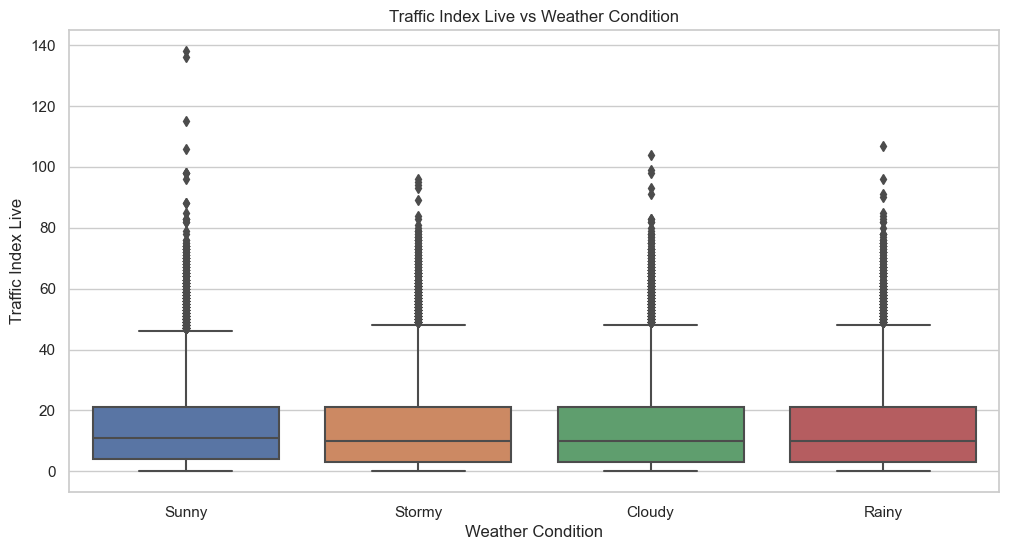

In [19]:
# Assuming Weather_Condition is a column in your dataset
# For demonstration, we'll create a sample Weather_Condition column if it doesn't exist
if 'Weather_Condition' not in data.columns:
    import numpy as np
    # Creating a sample Weather_Condition column for demonstration
    conditions = ['Sunny', 'Cloudy', 'Rainy', 'Stormy']
    np.random.seed(0)
    data['Weather_Condition'] = np.random.choice(conditions, size=len(data))

# Scatter plot to visualize the relationship between TrafficIndexLive and Weather_Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Condition', y='TrafficIndexLive', data=data)
plt.title('Traffic Index Live vs Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Index Live')
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


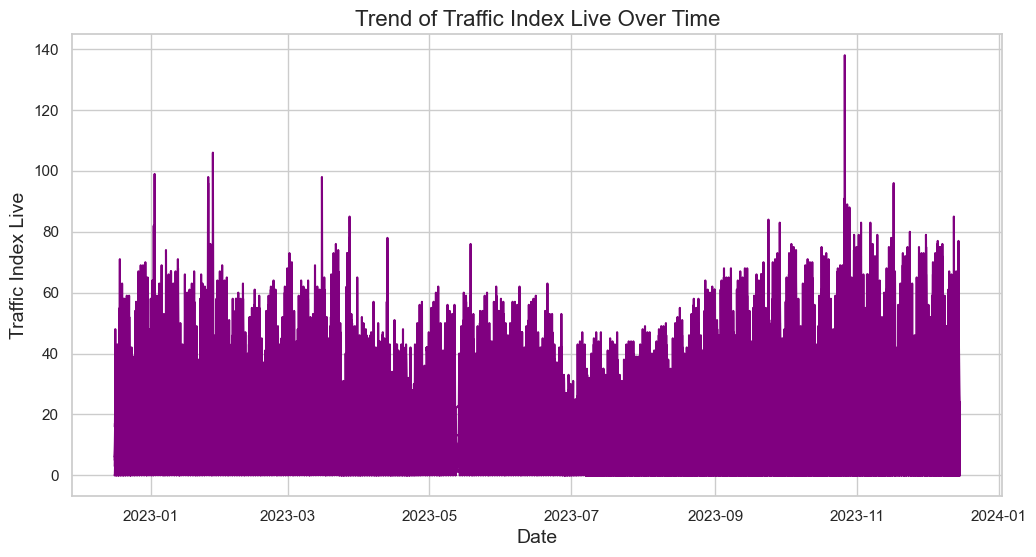

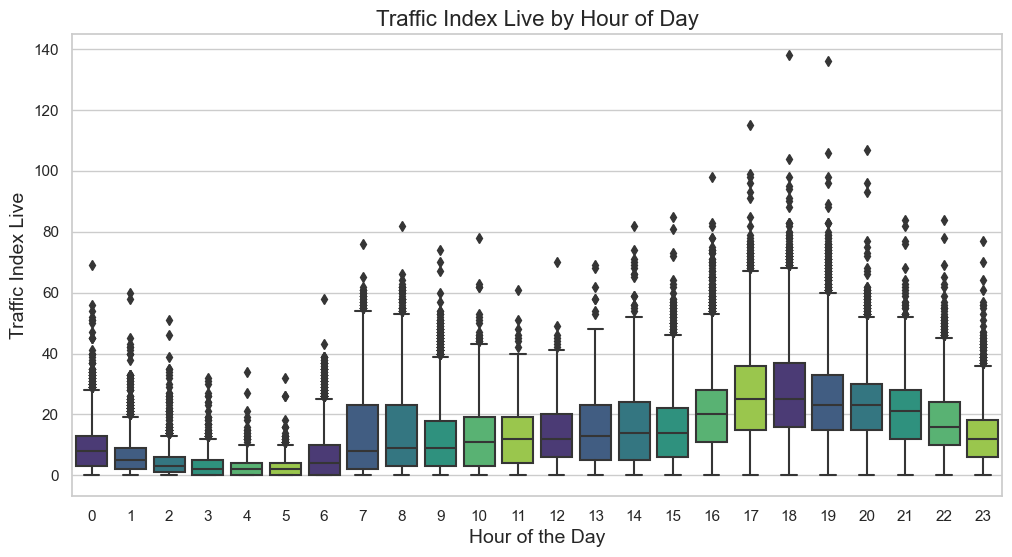

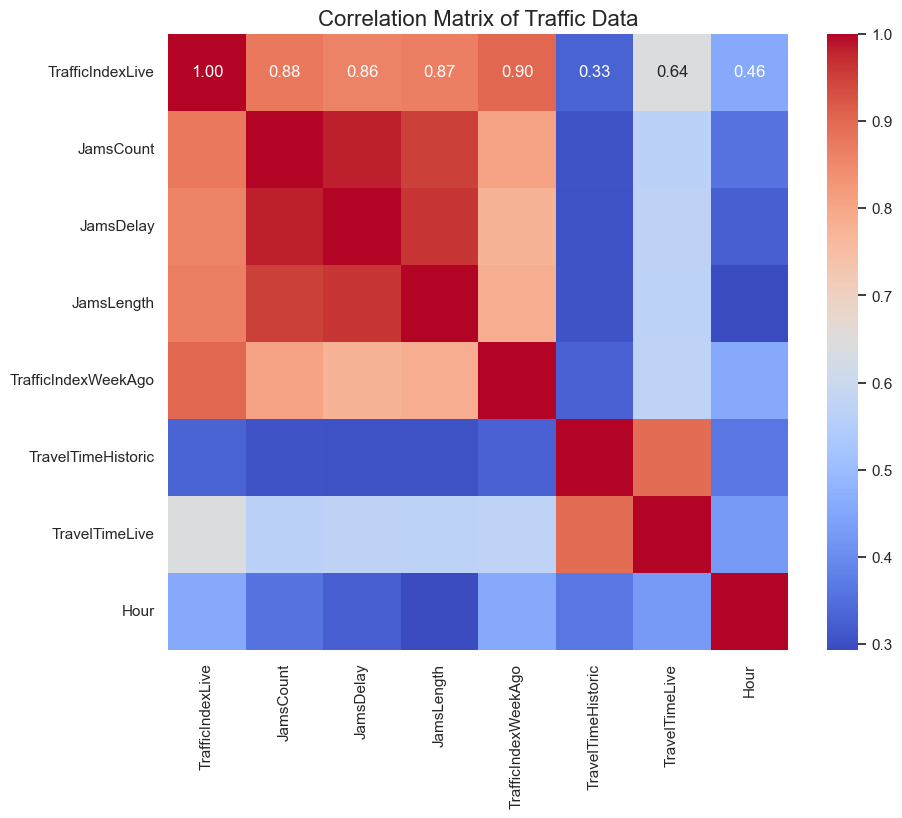

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


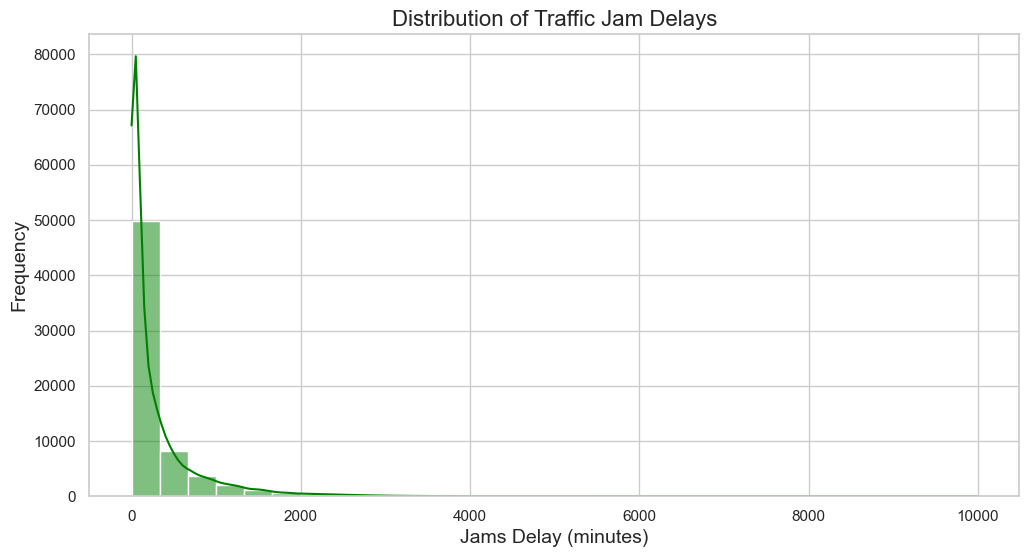

In [20]:
# Setting the style and color palette for the plots
sns.set(style="whitegrid")
color_palette = sns.color_palette("viridis", as_cmap=False)

# 1. Trend of Traffic Index Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['TrafficIndexLive'], color='purple')
plt.title('Trend of Traffic Index Live Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Traffic Index Live', fontsize=14)
plt.grid(True)
plt.show()

# 2. Box Plot of Traffic Index by Hour of Day
data['Hour'] = data['Datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='TrafficIndexLive', data=data, palette=color_palette)
plt.title('Traffic Index Live by Hour of Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Traffic Index Live', fontsize=14)
plt.show()

# 3. Correlation Heatmap
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Traffic Data', fontsize=16)
plt.show()

# 4. Histogram of Traffic Jam Delays
plt.figure(figsize=(12, 6))
sns.histplot(data['JamsDelay'], kde=True, color='green', bins=30)
plt.title('Distribution of Traffic Jam Delays', fontsize=16)
plt.xlabel('Jams Delay (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


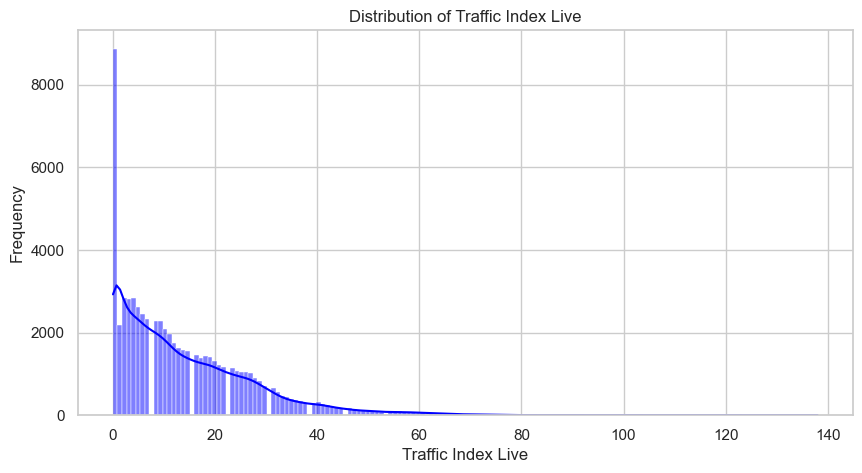

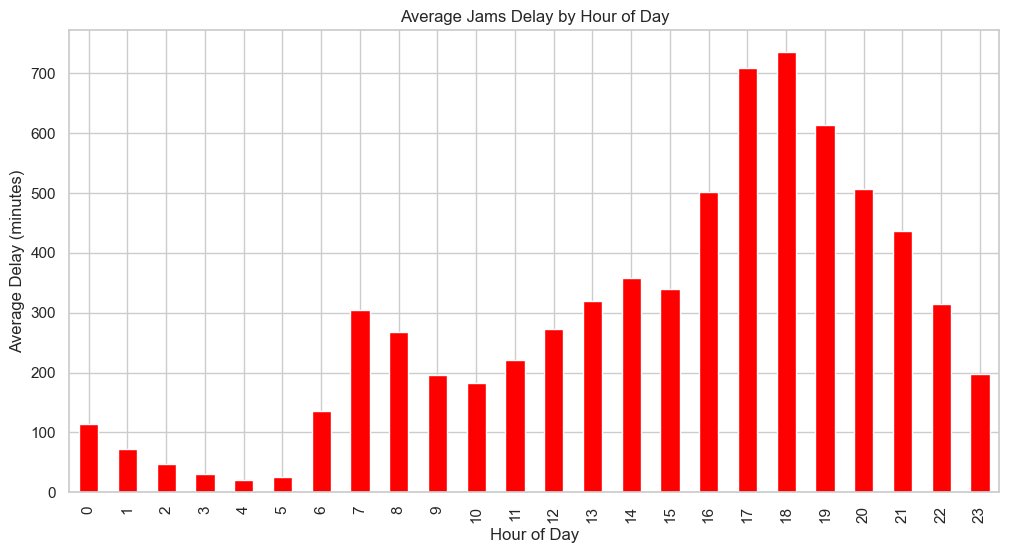

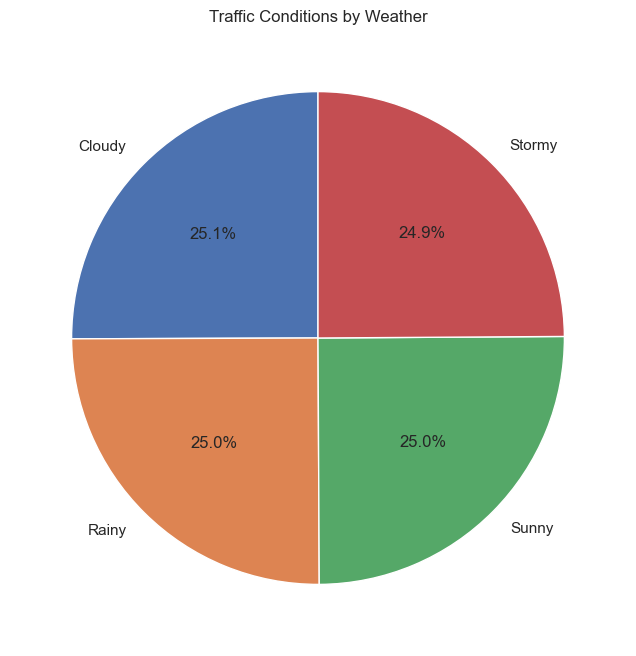

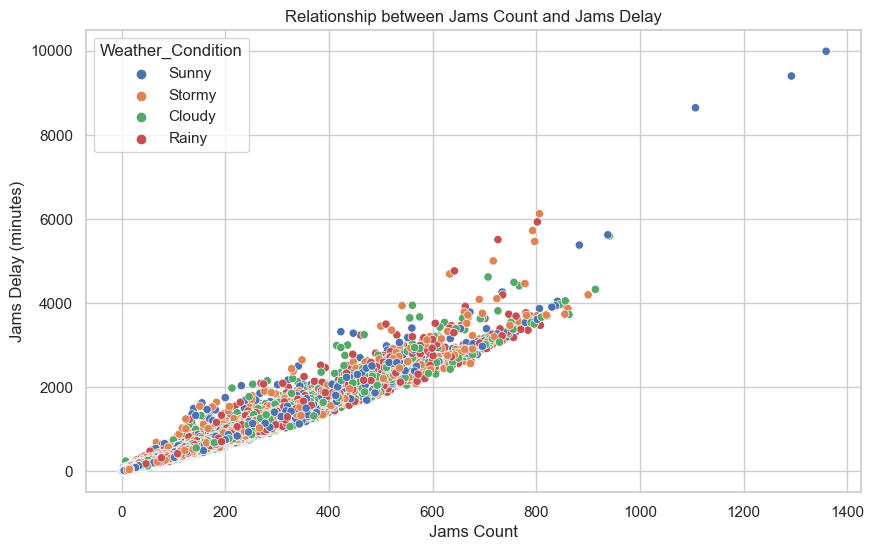

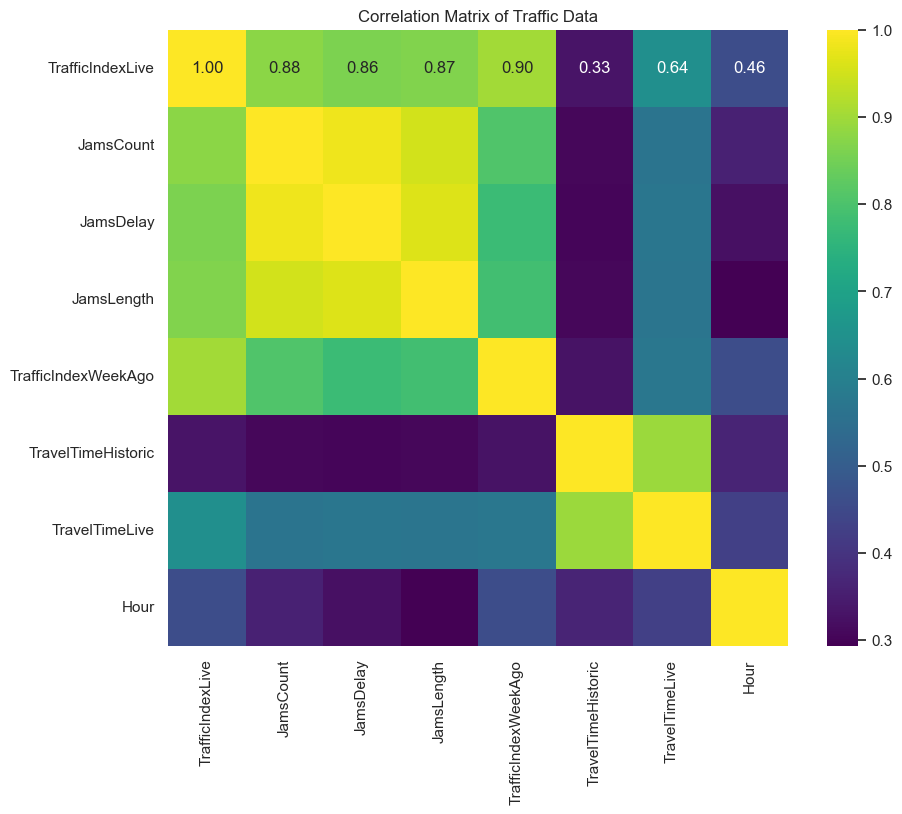

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
excel_path = 'Task (2) Dataset.xlsx'
data = pd.read_excel(excel_path)

# Prepare data
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Hour'] = data['Datetime'].dt.hour

# Assuming or creating a Weather_Condition column for demonstration
if 'Weather_Condition' not in data.columns:
    conditions = ['Sunny', 'Cloudy', 'Rainy', 'Stormy']
    np.random.seed(0)
    data['Weather_Condition'] = np.random.choice(conditions, size=len(data))

# 1. Histogram of TrafficIndexLive
plt.figure(figsize=(10, 5))
sns.histplot(data['TrafficIndexLive'], kde=True, color='blue')
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()

# 2. Bar Chart of Average JamsDelay by Hour
avg_delay_by_hour = data.groupby('Hour')['JamsDelay'].mean()
plt.figure(figsize=(12, 6))
avg_delay_by_hour.plot(kind='bar', color='red')
plt.title('Average Jams Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.show()

# 3. Pie Chart of Traffic Conditions by Weather
traffic_by_weather = data['Weather_Condition'].value_counts()
plt.figure(figsize=(8, 8))
traffic_by_weather.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Traffic Conditions by Weather')
plt.ylabel('')  # Hiding the y-label as it's unnecessary in pie charts
plt.show()

# 4. Scatter Plot of JamsCount vs. JamsDelay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JamsCount', y='JamsDelay', data=data, hue='Weather_Condition')
plt.title('Relationship between Jams Count and Jams Delay')
plt.xlabel('Jams Count')
plt.ylabel('Jams Delay (minutes)')
plt.show()

# 5. Heatmap of Correlation Matrix
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Traffic Data')
plt.show()


## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
##Key insights
#Traffic Variation: Traffic index fluctuates significantly, showing that traffic conditions vary widely, possibly due to day-to-day changes in commuter behavior or external factors.
#Peak Traffic Times: Traffic delays peak at certain hours, likely during morning and evening rush hours, indicating critical times for traffic management focus.
#Weather Impact: Weather conditions strongly influence traffic, with adverse weather leading to more severe traffic issues.
#Jams and Delays: There’s a clear positive correlation between the number of jams and the extent of traffic delays, emphasizing the direct impact of congestion on travel time.

In [ ]:
##Conclusion
#This analysis underscores the importance of timing and environmental factors in traffic management. Effective strategies should target peak times and consider weather forecasts to alleviate congestion and improve overall traffic flow.